In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [261]:
train_df = pd.read_csv('./input/train.csv')

In [262]:
test_df = pd.read_csv('./input/test.csv')

In [263]:
train_df.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

为了直观分析， 我们创建一个包含下列的excel表格：
1. Variable：变量名字
2. Type：变量类型，数值型或者类别型。
3. Segment：识别变量的分类。我们可以识别三种可能的类别"building", "space", "location"。 'Building'标识了房屋的物理特征。'space'标识了房屋的空间特征。'location'标识了房屋的空间特征， 如邻居。
4. Expection: 对变量的期望，每个特征变量对Y值得影响，'High', 'Medium', 'Low'
5. Conclusion: 观察分析数据，对每个特征变量实际的影响打分。
6. Comments: 备注

In [264]:
# descriptive statistics summary
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

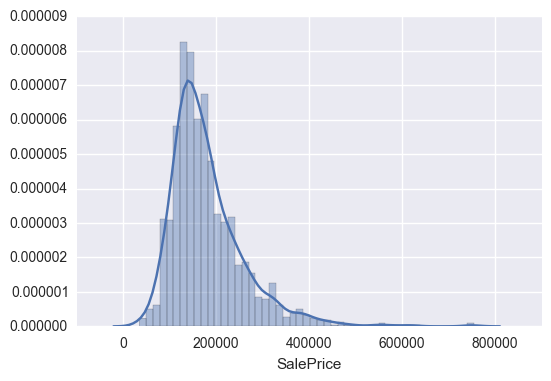

In [265]:
sns.distplot(train_df['SalePrice'])

由图分析可得：
1. 较正态分布偏移较大
2. 有正向偏度
3. 有峰度

In [266]:
# calculate skew and kurtosis
print("Skewness is %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness is 1.882876
Kurtosis: 6.536282


## Relationship with numerical variables

In [267]:
def plot_variable(column):
    sns.jointplot(x=column, y='SalePrice', data=train_df)

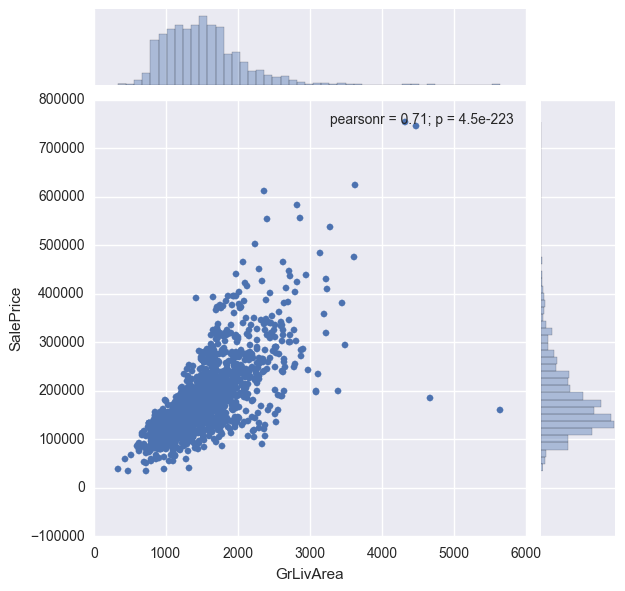

In [268]:
plot_variable('GrLivArea')
# SalePrice and GrLivArea have linear realtion

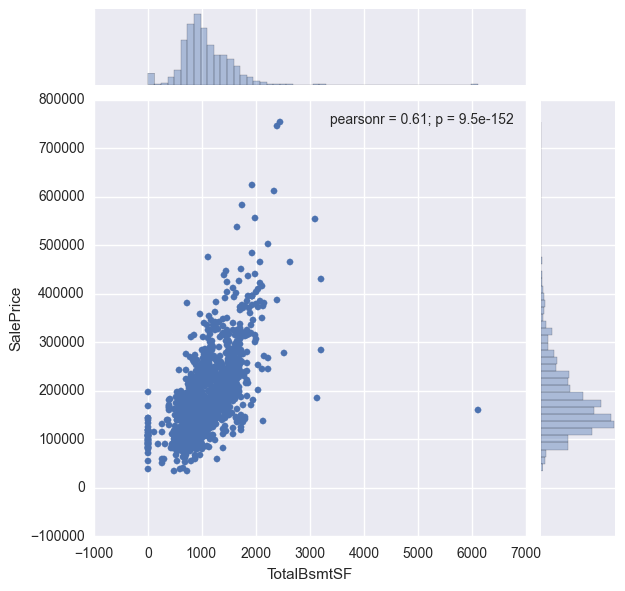

In [269]:
plot_variable('TotalBsmtSF')

In [270]:
def box_plot(column):
    f, ax = plt.subplots(figsize=(16, 8))
    sns.boxplot(x=column, y='SalePrice', data=train_df)

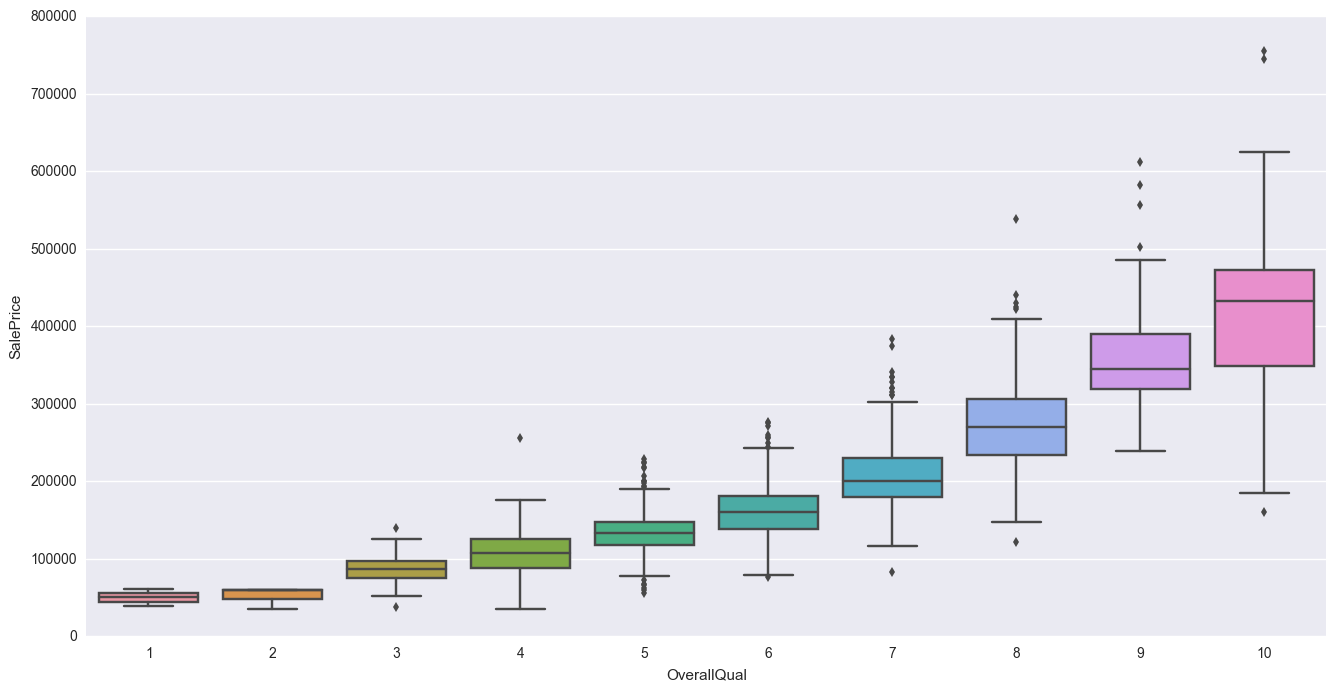

In [271]:
box_plot('OverallQual')
# 说明有较好的区分度

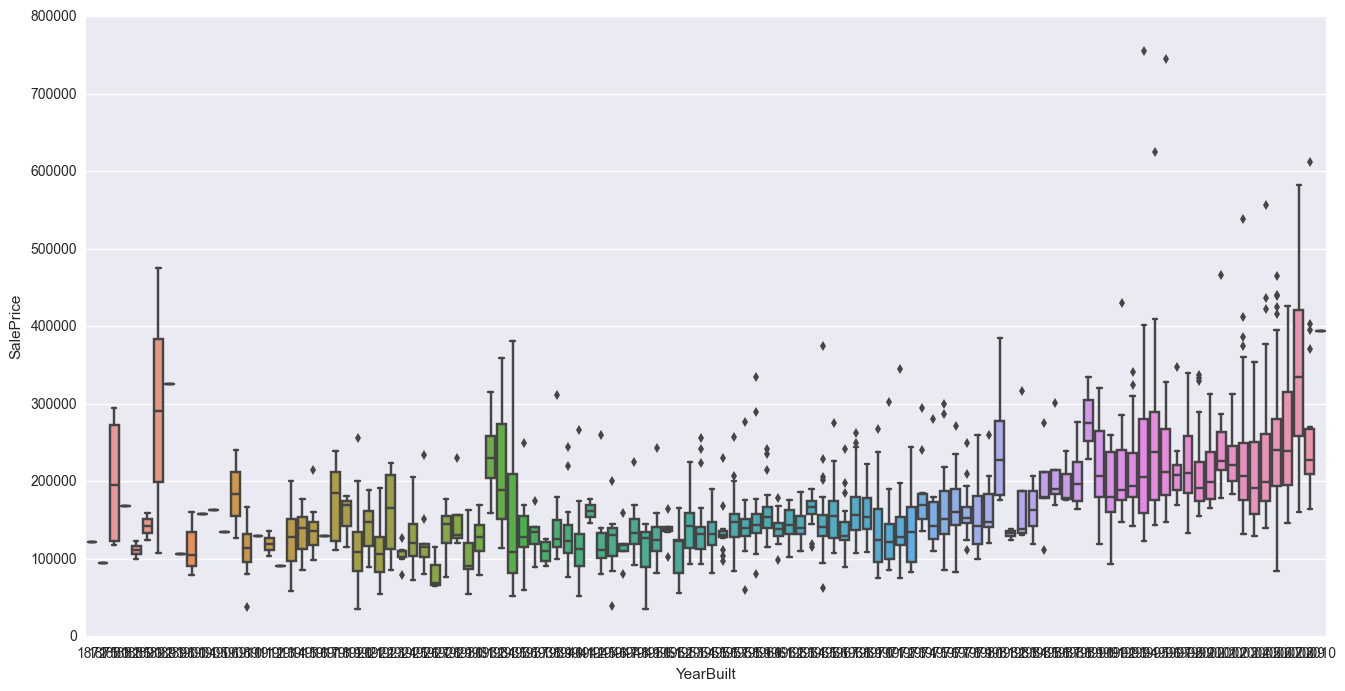

In [272]:
box_plot('YearBuilt')

上面的做法太笨重和主观化了， 需要一个更加客观和规律的方法。
1. Correlation matrix (heatmap style).
2. 'SalePrice' correlation matrix (zoomed heatmap style).
3. Scatter plots between the most correlated variables (move like Jagger style).


## Correlation matrix

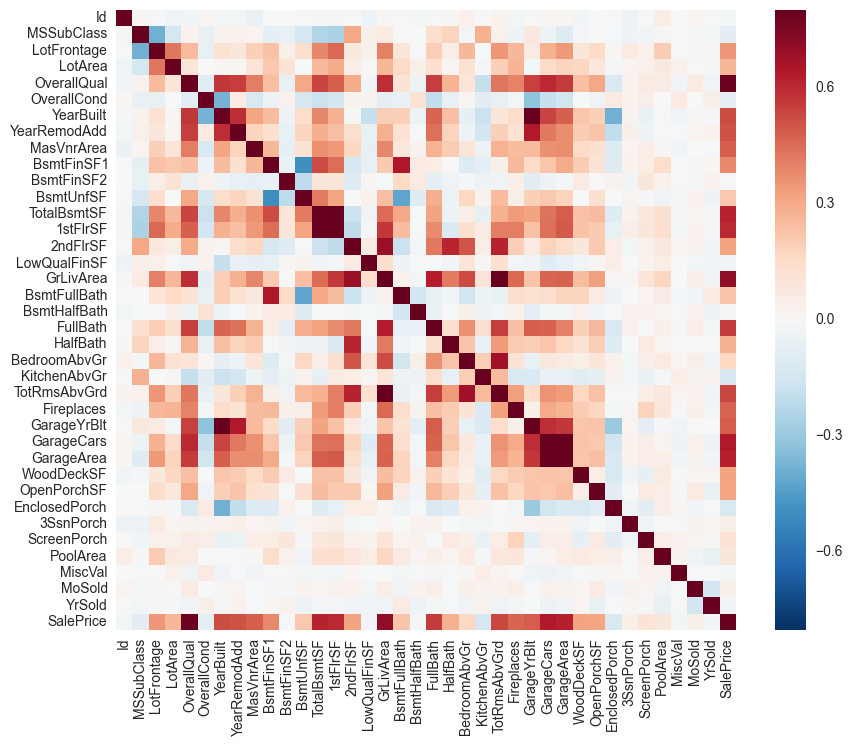

In [273]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [274]:
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


##  'SalePrice' correlation matrix (zoomed heatmap style).

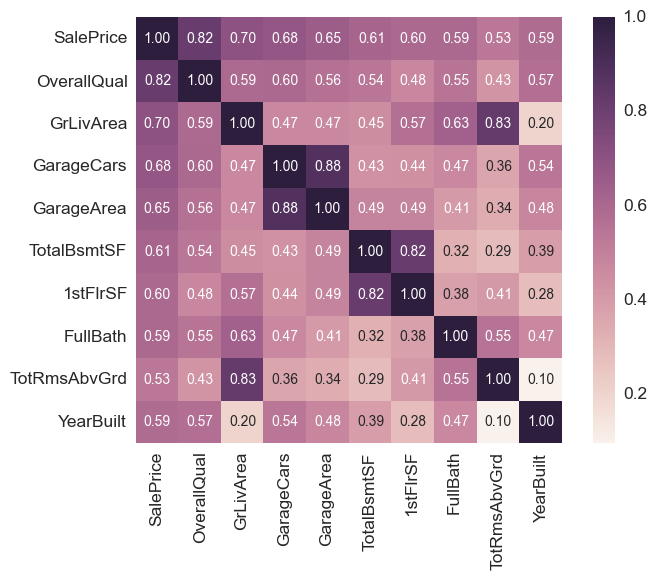

In [295]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = train_df[cols].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10})

所以， OverallQual, GrLivArea， TotalBsmtSF和SalePrice有很强的相关性。
同时会发现一些特征有相关性特征， 如GarageArea和GarageCars.

## scatter plots

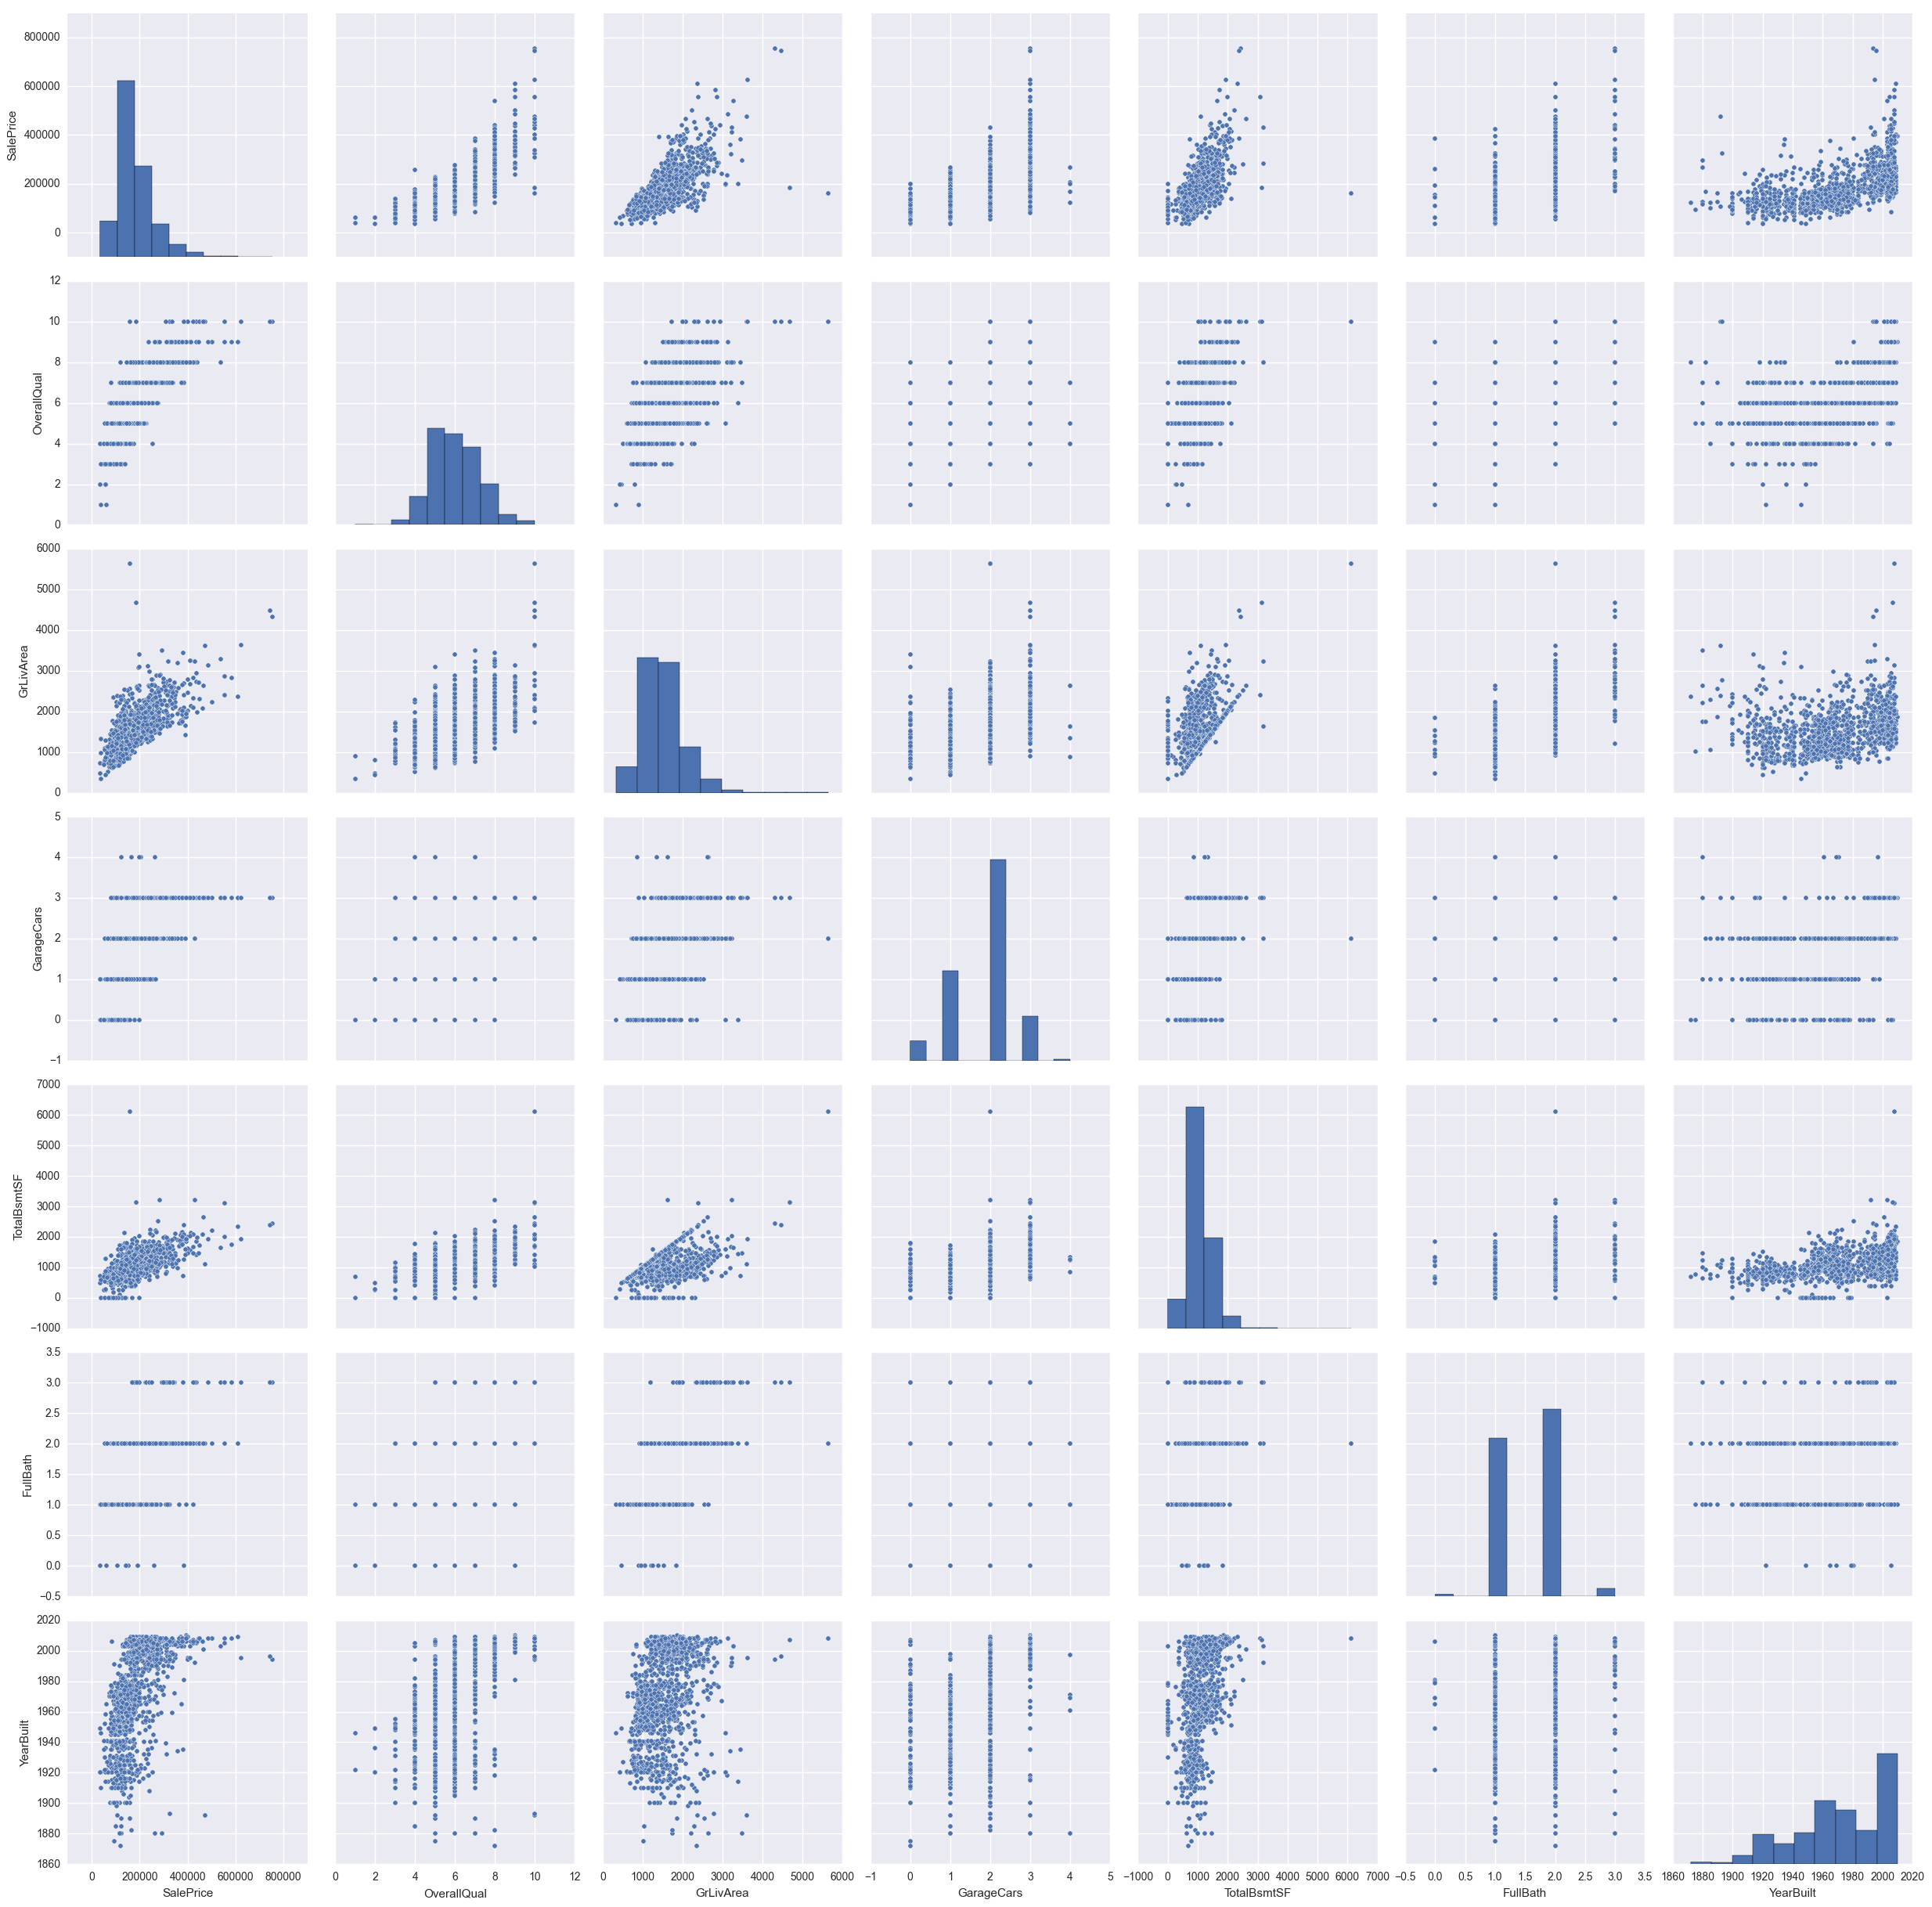

In [276]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 3.5)
plt.show();

## Missing Data
Important questions when thinking about missing data:
1. How prevalant is the missing data?
2. Is missing data random or does it have a pattern?

In [277]:
all_data = pd.concat((train_df.loc[:, 'MSSubClass':'SaleCondition'], test_df.loc[:, 'MSSubClass':'SaleCondition']))
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum() / all_data.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Total>0]

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


1. 对于缺失率大于15%的数据我们直接删除掉， 因为这些数据如果很重要可能有这么高的缺失率，除非他根本不重要， 我们也没必要花费大力气去填充它。
2. 对于GarageX有着相同的缺失率，通过查看数据是相同的行。可以一并处理， 同理BsmtX.
3. MasVnrX、Electrical占比很小，忽略。

In [278]:
all_data.drop(missing_data[missing_data.Total>1].index, axis=1, inplace=True)
all_data = all_data.fillna(all_data.mean())

## transform the skew data

In [279]:
from scipy.stats import skew
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
numerical_feats = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_feats = train_df[numerical_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [280]:
all_data = pd.get_dummies(all_data)

In [281]:
X_train = all_data[:train_df.shape[0]]
X_test = all_data[train_df.shape[0]:]
y = train_df.SalePrice

## ridge model

In [327]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [328]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

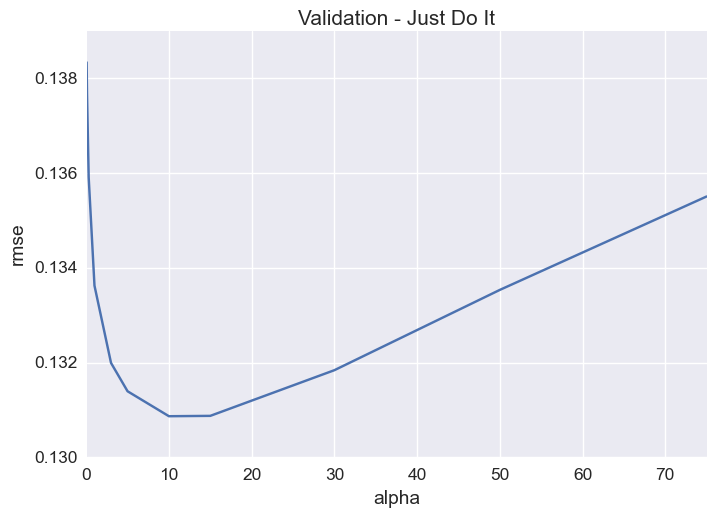

In [329]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [330]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [331]:
ridge_y_test = ridge_model.predict(X_test)

In [352]:
def out_put(y_test, exp=False):
    pred = np.expm1(y_test) if exp else y_test
    result = pd.DataFrame({
        'Id': test_df.Id,
        'SalePrice': pred,
    })
    result.to_csv('house.csv', index=False)

In [333]:
out_put(ridge_y_test)

# use xgboost model

In [355]:
help(xgb.cv)

Help on function cv in module xgboost.training:

cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(), obj=None, feval=None, maximize=False, early_stopping_rounds=None, fpreproc=None, as_pandas=True, verbose_eval=None, show_stdv=True, seed=0, callbacks=None)
    Cross-validation with given paramaters.
    
    Parameters
    ----------
    params : dict
        Booster params.
    dtrain : DMatrix
        Data to be trained.
    num_boost_round : int
        Number of boosting iterations.
    nfold : int
        Number of folds in CV.
    stratified : bool
        Perform stratified sampling.
    folds : a KFold or StratifiedKFold instance
        Sklearn KFolds or StratifiedKFolds.
    metrics : string or list of strings
        Evaluation metrics to be watched in CV.
    obj : function
        Custom objective function.
    feval : function
        Custom evaluation function.
    maximize : bool
        Whether to maximize feval.
    early_stopping

In [361]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y)
dtest = xgb.DMatrix(X_test)
params = {'max_depth':8, 'eta': 0.05}
model = xgb.cv(params, dtrain, num_boost_round=500, early_stopping_rounds=100)

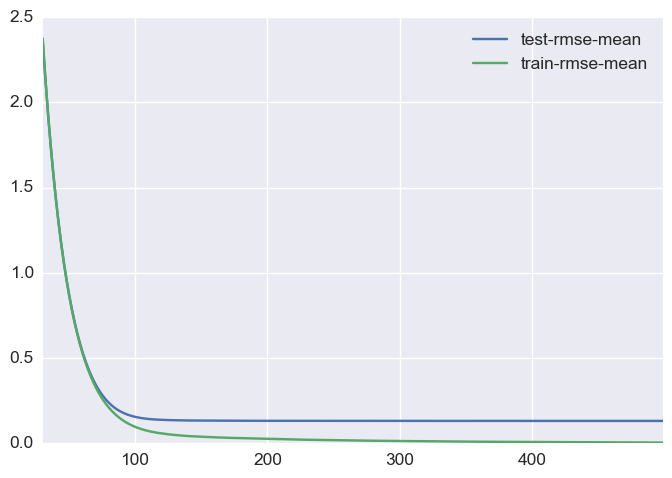

In [362]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [363]:
xgb_model = xgb.XGBRegressor(n_estimators=500, max_depth=8, learning_rate=0.05)
xgb_model.fit(X_train, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [364]:
xgb_y_test = xgb_model.predict(X_test)

In [365]:
out_put(xgb_y_test)

## Lasso model

In [346]:
lasso_model = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(lasso_model).mean()

0.12768204154808377

In [347]:
lasso_y_test = lasso_model.predict(X_test)

In [348]:
out_put(lasso_y_test)

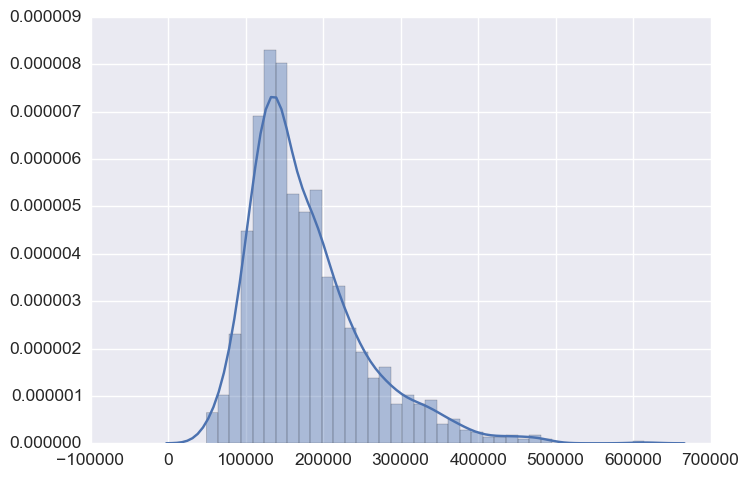

In [349]:
sns.distplot(np.expm1(lasso_y_test))

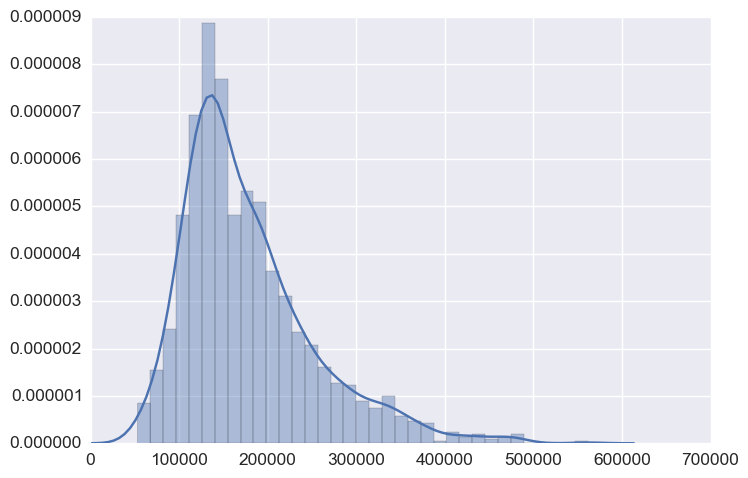

In [344]:
sns.distplot(np.expm1(ridge_y_test))

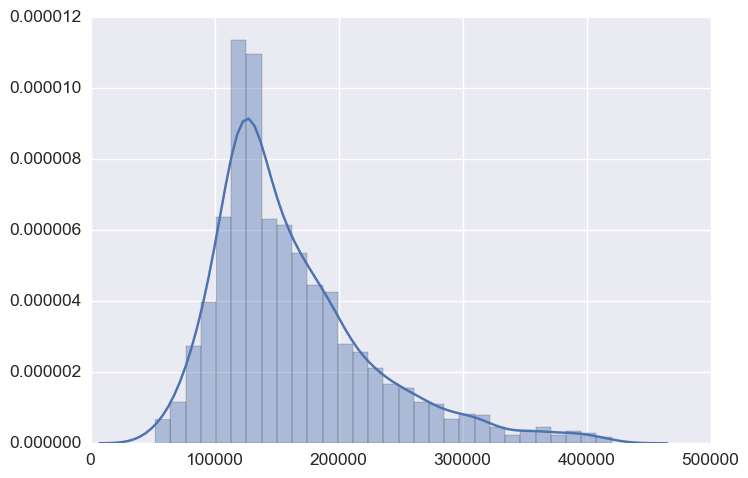

In [343]:
sns.distplot(np.expm1(xgb_y_test))

In [366]:
lasso_xgb_y_test = 0.3 * lasso_y_test + 0.7 * xgb_y_test

In [367]:
out_put(lasso_xgb_y_test)

In [372]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, ax=None, xticklabels=True, yticklabels=True, mask=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This function tries to infer a good colormap to use from the data, but
    this is not guaranteed to work, so take care to make sure the kind of
    colormap (sequential or diverging) and its limits are appropriate.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into a